In [61]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
colors = ['red','blue','green','magenta']
def fToC(f):
    return (f - 32) * 5.0/9.0
       
def plotDfStuff(df, dataName, second = False):
    # time plot
    fig, ax = plt.subplots(3,figsize = (10,28))
    x = df.index
    c = colors[0:len(df.columns)]
    # plot mean
    for iter, i in enumerate(df.columns):
        mean = df[i].mean()
        y = np.array([mean for x in range(len(x))])
        ax[0].plot(x, y, label = f'{i} mean', linestyle='--', color = c[iter])
    
    # set the second axis in celcius degrees    
    if second:
        ax_c = ax[0].twinx()
        y1, y2 = ax[0].get_ylim()
        ax_c.set_ylim(fToC(y1), fToC(y2))
        ax_c.figure.canvas.draw()
        ax_c.set_ylabel('Celcius')
        
    ax[0].legend()
    ax[0].set_ylim(bottom = 0, top = np.max(df.max()))
    df.plot(title = dataName,
            ylabel = dataName,
            rot = 30, ax = ax[0], color = c)


    # histogram
    for iter, i in enumerate(df.columns):
        df[i].hist(ax=ax[1], label = i, color = c[iter] )
    ax[1].legend()
    ax[1].set_title("Bar plot of the dataframe")
    ax[1].set_xlabel(dataName)
    ax[1].set_ylabel("# of data")
    ax[1].set_ylim(bottom = 0)
    # kernel density
    df.plot.kde(title = 'PDF', xlabel = dataName, ax = ax[2], color = c)
    ax[2].set_ylim(bottom = 0)
    # statistics
    return df.describe()

In [62]:
usa = pd.read_csv('usa.csv', index_col = 0, parse_dates = True, header=1, names = ['Week', 'US'])
uk = pd.read_csv('uk.csv', index_col = 0, parse_dates = True, header=1, names = ['Week','UK'])
pl = pd.read_csv('poland.csv', index_col = 0, parse_dates = True, header=1, names = ['Week','PL'])

all = pd.merge(
    pd.merge(uk, pl, 'outer', left_on = 'Week', right_on = 'Week'),
    usa, how = 'outer', left_on = 'Week', right_on = 'Week',
)


# PLOT THE DF

,UK,PL,US
count,52.000000,52.000000,52.000000
mean,85.153846,27.307692,45.365385
std,13.311332,14.962094,13.487872
min,0.000000,0.000000,0.000000
25%,81.750000,22.750000,40.000000
50%,86.500000,24.000000,42.500000
75%,90.000000,26.250000,46.000000
max,100.000000,100.000000,100.000000


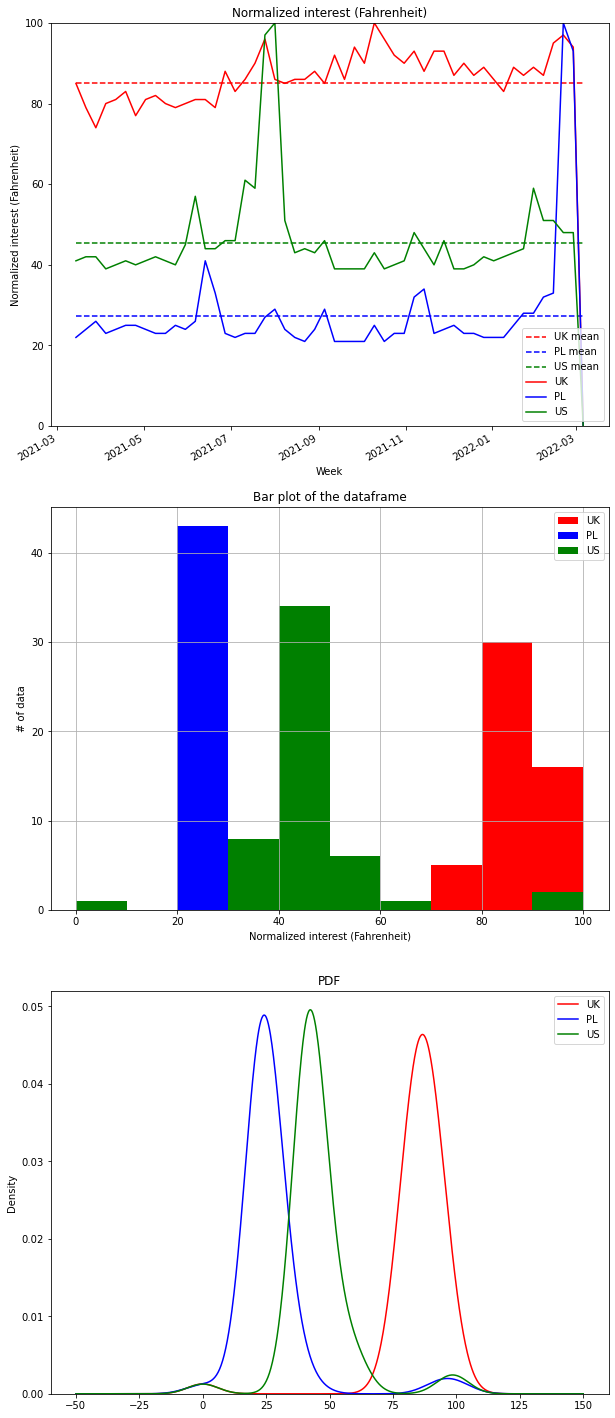

In [63]:
plotDfStuff(all, 'Normalized interest (Fahrenheit)', False)

# SECOND

DEPARTURE FROM MEAN (30.9°F) 1940-2022 BASE PERIOD


,Value,Anomaly,DEPARTURE FROM MEAN (30.9°F) 1940-2022 BASE PERIOD
Date,,,
1940-01-01,14.4,-16.0,16.49759
1941-01-01,33.7,3.3,-2.80241
1942-01-01,31.1,0.7,-0.20241
1943-01-01,30.3,-0.1,0.59759
1944-01-01,35.8,5.4,-4.90241
...,...,...,...
2018-01-01,29.8,-0.6,1.09759
2019-01-01,30.8,0.4,0.09759
2020-01-01,35.7,5.3,-4.80241


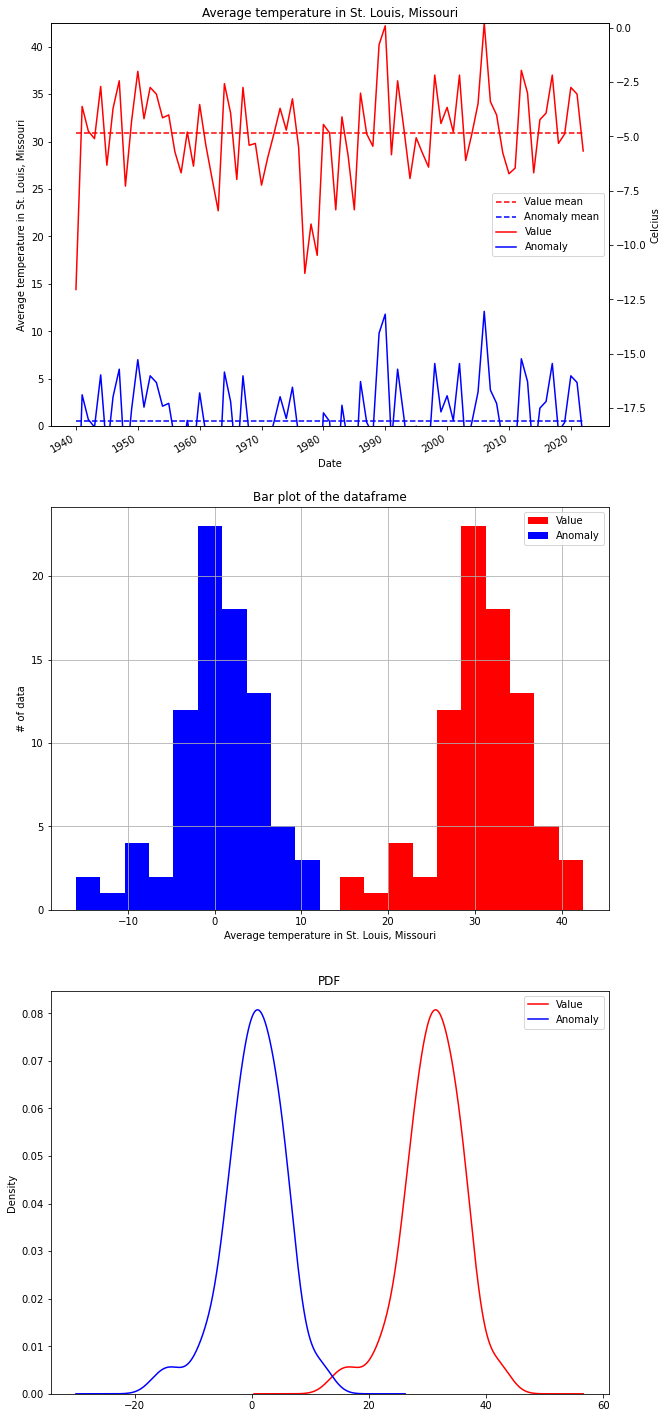

In [64]:
temp = pd.read_csv(
                    'temperature.csv', index_col = 0,
                    parse_dates = True, header=1,
                    names = ['Date','Value', 'Anomaly'],
                    skiprows=4, na_values=-99,
                    date_parser = lambda x: datetime.strptime(x,'%Y%M').date()
                 ).fillna(np.nan)
# interpolate nans if there are any
temp = temp.interpolate()

# plot like before
plotDfStuff(temp, 'Average temperature in St. Louis, Missouri', True)

# get departure from mean
mean = temp['Value'].mean()
first_year = list(temp.index)[0].year
last_year = list(temp.index)[-1].year
deg = u"\N{DEGREE SIGN}"
name = f'Departure from mean ({mean:.1f}{deg}F) {first_year}-{last_year} base period'.upper()

print(name)
temp[name] = mean - temp['Value']
temp